In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

from tensorflow.keras import Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional, Dropout, LeakyReLU, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data_01 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_1_000000001_249250621_2022_03_24__15_01_23.h5', 'r')
train_data_02 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_2_000000001_243199373_2022_03_24__15_03_38.h5', 'r')
train_data_03 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_3_000000001_198022430_2022_03_24__15_05_28.h5', 'r')
train_data_04 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_4_000000001_191154276_2022_03_24__15_06_55.h5', 'r')
train_data_05 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_5_000000001_180915260_2022_03_24__15_08_05.h5', 'r')
train_data_06 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_6_000000001_171115067_2022_03_24__15_09_29.h5', 'r')
train_data_07 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_7_000000001_159138663_2022_03_24__15_10_49.h5', 'r')
train_data_08 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_8_000000001_146364022_2022_03_24__15_12_04.h5', 'r')
train_data_09 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_9_000000001_141213431_2022_03_24__15_13_06.h5', 'r')
train_data_10 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_10_000000001_135534747_2022_03_24__15_14_10.h5', 'r')
train_data_11 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_11_000000001_135006516_2022_03_24__15_15_21.h5', 'r')
train_data_12 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_12_000000001_133851895_2022_03_24__15_16_24.h5', 'r')
train_data_13 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_13_000000001_115169878_2022_03_24__15_17_32.h5', 'r')
train_data_14 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_14_000000001_107349540_2022_03_24__15_18_11.h5', 'r')
train_data_15 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_15_000000001_102531392_2022_03_24__15_18_58.h5', 'r')
train_data_16 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_16_000000001_090354753_2022_03_24__15_19_46.h5', 'r')
train_data_17 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_17_000000001_081195210_2022_03_24__15_20_31.h5', 'r')

test_data_18 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_18_000000001_078077248_2022_03_24__15_21_24.h5', 'r')  
test_data_19 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_19_000000001_059128983_2022_03_24__15_21_55.h5', 'r') 
test_data_20 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_20_000000001_063025520_2022_03_24__15_22_44.h5', 'r')  
test_data_21 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_21_000000001_048129895_2022_03_24__15_23_19.h5', 'r')  
test_data_22 = h5py.File(r'/content/drive/MyDrive/Data/Chromosomes/znf_marvin_hg19_bin50_050_22_000000001_051304566_2022_03_24__15_23_38.h5', 'r')  

train_data_binlabels = np.concatenate(np.array([train_data_01['binlabels'], train_data_02['binlabels'], train_data_03['binlabels'], train_data_04['binlabels'], train_data_05['binlabels'], train_data_06['binlabels'], 
                                                train_data_07['binlabels'], train_data_08['binlabels'], train_data_09['binlabels'], train_data_10['binlabels'], train_data_11['binlabels'], train_data_12['binlabels'],
                                                train_data_13['binlabels'], train_data_14['binlabels'], train_data_15['binlabels'], train_data_16['binlabels'], train_data_17['binlabels']]))

train_data_features =  np.concatenate(np.array([train_data_01['data'], train_data_02['data'], train_data_03['data'], train_data_04['data'], train_data_05['data'], train_data_06['data'], 
                                                train_data_07['data'], train_data_08['data'], train_data_09['data'], train_data_10['data'], train_data_11['data'], train_data_12['data'],
                                                train_data_13['data'], train_data_14['data'], train_data_15['data'], train_data_16['data'], train_data_17['data']]))

test_data_binlabels = np.concatenate(np.array([test_data_18['binlabels'], test_data_19['binlabels'], test_data_20['binlabels'], test_data_21['binlabels'], test_data_22['binlabels']]))

test_data_features = np.concatenate(np.array([test_data_18['data'], test_data_19['data'], test_data_20['data'], test_data_21['data'], test_data_22['data']]))

train_data_features = np.array([i.T for i in train_data_features])
test_data_features = np.array([i.T for i in test_data_features])

train_data_01.close()
train_data_02.close()
train_data_03.close()
train_data_04.close()
train_data_05.close()
train_data_06.close()
train_data_07.close()
train_data_08.close()
train_data_09.close()
train_data_10.close()
train_data_11.close()
train_data_12.close()
train_data_13.close()
train_data_14.close()
train_data_15.close()
train_data_16.close()
train_data_17.close()

test_data_18.close()
test_data_18.close()
test_data_20.close()
test_data_21.close()
test_data_22.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/lo

In [4]:
train_data_features.shape

(553571, 1000, 4)

In [5]:
test_data_features.shape

(94708, 1000, 4)

In [11]:
def plot_loss_and_AUC(model_history):
  fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

  ax[0].plot(model_history.history["loss"])
  ax[0].plot(model_history.history["val_loss"])
  ax[0].title.set_text('model train loss vs validation loss')
  ax[0].set(xlabel="loss", ylabel="epoch")
  ax[0].legend(['train', 'validation'], loc='upper right')

  ax[1].plot(model_history.history["AUC"])
  ax[1].plot(model_history.history["val_AUC"])
  ax[1].title.set_text('model train accuracy vs validation accuracy')
  ax[1].set(xlabel="accuracy", ylabel="epoch")
  ax[1].legend(['train', 'validation'], loc='lower right')

  plt.show()

In [6]:
!git clone -l -s https://github.com/Vic-Dim/Thesis thesis
%cd 'thesis/model weights'
print('\nFiles:')
!ls
multilabel_model = load_model('multilabel_classification_convrnn_on_real_data.h5')

In [7]:
new_hidden_layer = Dropout(0.2)(multilabel_model.layers[-2].output)
new_hidden_layer = Dense(units = 8, activation = 'sigmoid', name='dense_1')(new_hidden_layer)

new_multilabel_model = Model(multilabel_model.input, new_hidden_layer)

new_multilabel_model.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(beta_1 = 0.95),
    metrics = [AUC(name = "AUC", multi_label=True)]
)

for layer in new_multilabel_model.layers:
  if layer.name != 'dense_1':
    layer.trainable = False

new_multilabel_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 4)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1000, 50)          2050      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 250, 100)          20100     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 62, 100)          0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800

In [8]:
callback = [EarlyStopping(patience = 2)]

new_multilabel_model_history = new_multilabel_model.fit(train_data_features, train_data_binlabels, epochs = 50, batch_size = 1000, validation_split = 5e-2, shuffle = True, callbacks = callback)  

Epoch 1/50
526/526 [==============================] - 121s 214ms/step - loss: 0.3964 - AUC: 0.6555 - val_loss: 0.3512 - val_AUC: 0.7575
Epoch 2/50
526/526 [==============================] - 111s 210ms/step - loss: 0.3160 - AUC: 0.8140 - val_loss: 0.2961 - val_AUC: 0.8426
Epoch 3/50
526/526 [==============================] - 111s 211ms/step - loss: 0.2843 - AUC: 0.8552 - val_loss: 0.2824 - val_AUC: 0.8594
Epoch 4/50
526/526 [==============================] - 111s 210ms/step - loss: 0.2725 - AUC: 0.8683 - val_loss: 0.2747 - val_AUC: 0.8669
Epoch 5/50
526/526 [==============================] - 111s 211ms/step - loss: 0.2647 - AUC: 0.8767 - val_loss: 0.2728 - val_AUC: 0.8718
Epoch 6/50
526/526 [==============================] - 111s 211ms/step - loss: 0.2585 - AUC: 0.8834 - val_loss: 0.2687 - val_AUC: 0.8760
Epoch 7/50
526/526 [==============================] - 111s 212ms/step - loss: 0.2529 - AUC: 0.8892 - val_loss: 0.2653 - val_AUC: 0.8771
Epoch 8/50
526/526 [============================

In [9]:
new_multilabel_model.evaluate(test_data_features, test_data_binlabels)

2960/2960 [==============================] - 50s 17ms/step - loss: 0.2763 - AUC: 0.8766


[0.2763398289680481, 0.8766348361968994]

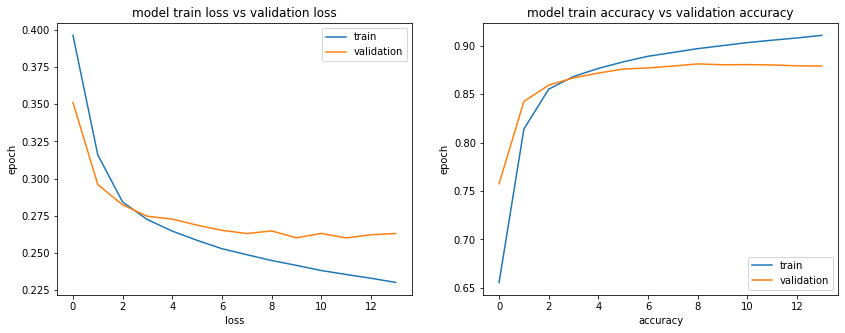

In [15]:
plot_loss_and_AUC(new_multilabel_model_history)

In [13]:
new_multilabel_model.save('/content/drive/MyDrive/Data/convrnn_multilabel_classification_8_factors_real_data.h5')